now loss =  0.1808724560433325  accuracy =  0.684
gradient of first layer [[-0.07744788 -0.26657356  0.06777491  0.29275662 -0.08944882 -0.23512905
  -0.27468576 -0.16527042  0.22169788  0.21092774]
 [-0.04034235 -0.62649035  0.49545245  0.10628071  0.72791738  0.00448151
   0.14124937  0.2425211   0.07769399 -0.0558281 ]
 [ 0.00610366  0.19979755  0.39320667 -0.4095081  -0.07572955 -0.01547589
  -0.15464427 -0.41503966  0.07899618 -0.11112828]
 [ 0.37844371 -0.53780093  0.2407952   0.38486458 -0.59882674 -0.13702275
   0.49562978  0.24787186 -0.1526701   0.10931066]
 [-0.06614395 -0.1517539  -0.11647016 -0.11534242 -0.43728971  0.1470622
   0.20837228  0.03242494  0.37460612  0.6337539 ]
 [ 0.40117356  0.84329932  0.36237475  0.18352367  0.6084485  -0.27540447
  -0.20654706 -0.19630229 -0.01070293  0.08548563]
 [ 0.02750023  0.32158354  0.20911348  0.12139281 -0.02645482 -0.37219882
   0.02195599  0.03248126  0.29849626 -0.04217213]
 [-0.36451509 -0.19570538 -0.14640077 -0.3171622  -0

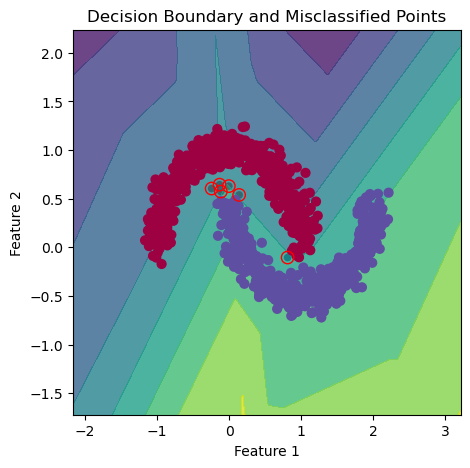

In [1]:
import numpy as np

from layers import Affine, Relu, Sigmoid
from model import Model
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=1000, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

nn = Model(layers=[Affine(10), Relu(), Affine(10), Affine(1)])

targets = np.reshape(y, (y.shape[0], 1))
nn.fit(X, targets, n_epochs=100, lr=1e-3)


# Create a mesh grid for plotting decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the grid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Predict on the original data
y_pred = nn.predict(X)
# Threshold predictions to get binary labels
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Find misclassified points
misclassified = y_pred_labels != y

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
# Plot correctly classified points
plt.scatter(X[~misclassified, 0], X[~misclassified, 1], c=y[~misclassified], s=40, cmap=plt.cm.Spectral)
# Highlight misclassified points
plt.scatter(X[misclassified, 0], X[misclassified, 1], facecolors='none', edgecolors='r', s=80, marker='o')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Misclassified Points')
plt.show()
